In [77]:
# import supporting libraries

import pandas as pd
import numpy as np


In [78]:
# load the dataset

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [79]:
df.shape

(400, 5)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [81]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [82]:
df= df.drop(columns=['User ID'],axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [83]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df.Gender=le.fit_transform(df.Gender)

df.head()


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [85]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

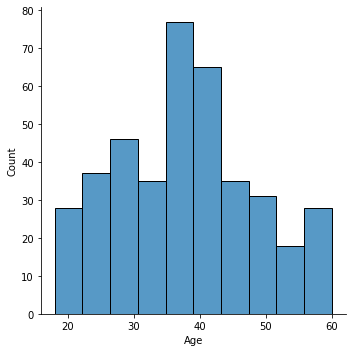

In [87]:
sns.displot(df.Age)

In [88]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

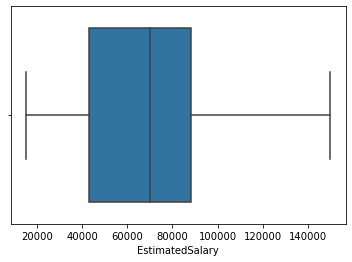

In [89]:
sns.boxplot(df.EstimatedSalary)

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

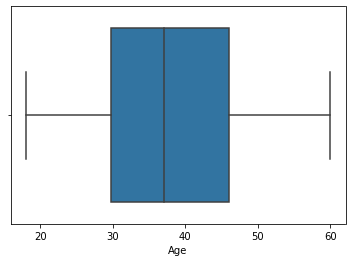

In [90]:
sns.boxplot(df.Age)

In [91]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

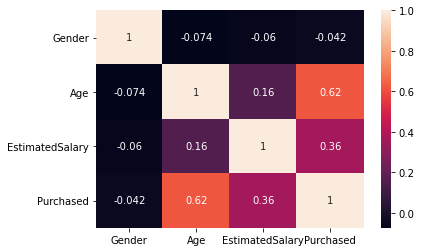

In [92]:
sns.heatmap(df.corr(),annot=True)

In [93]:
df.corr().Purchased.sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

In [94]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [95]:
# X and y split

X=df.drop(columns=['Purchased'],axis = 1)
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [96]:
y = df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [97]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [98]:
scaled_x = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled_x.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [99]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.2,random_state = 1)

In [100]:
x_train.shape

(320, 3)

In [101]:
x_test.shape

(80, 3)

## Model building

In [102]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression()

In [104]:
model.fit(x_train,y_train)

LogisticRegression()

In [105]:
y_test

398    0
125    0
328    1
339    1
172    0
      ..
347    1
41     0
180    0
132    0
224    0
Name: Purchased, Length: 80, dtype: int64

In [106]:
pred_test= model.predict(x_test)
pred_test

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [107]:
model.predict([[1,35,50000]]) # testing with a random observation

array([1], dtype=int64)

In [108]:
pred_train = model.predict(x_train)
pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,

# Evaluating the model

In [122]:
# accuracy score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [110]:
accuracy_score(y_test,pred_test) # test accuracy

0.825

In [111]:
accuracy_score(y_train,pred_train) # train accuracy

0.825

In [112]:
# Confusion matrix

pd.crosstab(y_test,pred_test)

col_0,0,1
Purchased,,
0,42,6
1,8,24


In [113]:
confusion_matrix(y_test,pred_test)

array([[42,  6],
       [ 8, 24]], dtype=int64)

In [115]:
# Classification report

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.80      0.75      0.77        32

    accuracy                           0.82        80
   macro avg       0.82      0.81      0.82        80
weighted avg       0.82      0.82      0.82        80



In [116]:
# Precision 

#  TP/(TP+FP)

24/30


0.8

In [117]:
# Recall

# TP /(TP+FN)

24/32

0.75

In [118]:
# F1 score

# 2*precision*Recall / (precision+Recall)

2*0.8*0.75/(0.8+0.75)

0.7741935483870969

In [121]:
# ROC - AUC Score

probability = model.predict_proba(x_test)[:,1]
probability


array([0.14721122, 0.30675839, 0.51491165, 0.6253914 , 0.23340031,
       0.2989511 , 0.02469549, 0.73727808, 0.06359982, 0.88293985,
       0.23280667, 0.36380243, 0.26004561, 0.85601019, 0.79376247,
       0.94423585, 0.9047057 , 0.08911327, 0.16704419, 0.93441893,
       0.40282481, 0.75186938, 0.81209415, 0.45116132, 0.3091392 ,
       0.03338153, 0.77067529, 0.67069809, 0.57983011, 0.87091681,
       0.23201464, 0.05119785, 0.05454613, 0.8443512 , 0.14267106,
       0.1843651 , 0.02206378, 0.2426364 , 0.41473161, 0.0178229 ,
       0.87411853, 0.91419902, 0.43798442, 0.06490515, 0.78063266,
       0.35963568, 0.43319691, 0.78167549, 0.393962  , 0.57079526,
       0.06345487, 0.23026346, 0.48951115, 0.34548229, 0.45829867,
       0.26137091, 0.79811239, 0.2057649 , 0.90359366, 0.75985512,
       0.15948134, 0.08900638, 0.53793042, 0.17650899, 0.41427172,
       0.6764913 , 0.04913592, 0.4364346 , 0.77083155, 0.23634518,
       0.6877761 , 0.15863884, 0.54323726, 0.3595567 , 0.06916

In [123]:
fpr,tpr,thresholds = roc_curve(y_test,probability)

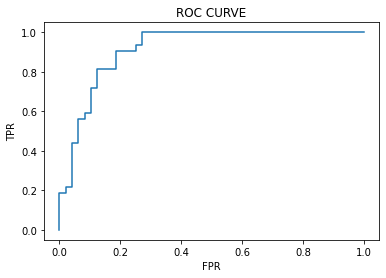

In [125]:
plt.plot(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [126]:
roc_auc_score(y_test,probability)

0.9127604166666667